SE

Population: http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__BE__BE0101__BE0101A/BefolkningNy/
yearly -> 2018
lag ->2018 published 21-02-2019

Share labour force:
http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__AM__AM0401__AM0401N/NAKUBefolkningLK/
quarterly -> 2019K2
lag ->2019K2 published 25-07-2019

MVU_LVU share:
http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__UF__UF0506/UtbBefRegionR/
yearly -> 2018
lag ->2018 published 23-04-2019

Urban:
http://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__MI__MI0810__MI0810A/TatortGrad/table/tableViewLayout1/#

https://en.wikipedia.org/wiki/List_of_urban_areas_in_Sweden_by_population

yearly -> every 5th year
lag ->2015 published 25-10-2016

Socio:

NO:

Population:
https://www.ssb.no/en/statbank/table/07459/
yearly -> 2019
updated: 2019-02-22

Population share labour force:
https://www.ssb.no/en/statbank/table/05615/
quarterly -> 2019K2
updated: 2019-07-25

MVU_LVU share:
https://www.ssb.no/en/statbank/table/08921/
yearly -> 2018
updated: 2019-06-20

Urban:
https://www.ssb.no/en/statbank/table/05212/
yearly -> 2018
updated:

Socio:

### Import

In [2]:
import pydst
from func import global_id, quarter_to_month
import pandas as pd
import numpy as np
import requests
import datetime

/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## DK

### Initial definitions

##### df_global_mun_reg

Urbanisation 

In [263]:
df_urban = pd.read_csv('data/other/df_urbanisation.csv', sep=";")

Global kom nummer df

In [264]:
mun = [101, 147, 155, 185, 165, 151, 153, 157, 159, 161, 163, 167, 169, 183, 173, 175, 187, 201, 240, 210, 250, 190, 270, 260, 217, 219, 223, 230, 400, 411, 253, 259, 350, 265, 269, 320,
       376, 316, 326, 360, 370, 306, 329, 330, 340, 336, 390, 420, 430, 440, 482, 410, 480, 450, 461, 479, 492, 530, 561, 563, 607, 510, 621, 540, 550, 573, 575, 630, 580, 710, 766, 615,
       707, 727, 730, 741, 740, 746, 706, 751, 657, 661, 756, 665, 760, 779, 671, 791, 810, 813, 860, 849, 825, 846, 773, 840, 787, 820, 851]

In [265]:
dst_name = ['København', 'Frederiksberg', 'Dragør', 'Tårnby', 'Albertslund', 'Ballerup', 'Brøndby', 'Gentofte', 'Gladsaxe', 'Glostrup', 'Herlev', 'Hvidovre', 'Høje-Taastrup', 'Ishøj', 'Lyngby-Taarbæk',
            'Rødovre', 'Vallensbæk', 'Allerød', 'Egedal', 'Fredensborg', 'Frederikssund', 'Furesø', 'Gribskov', 'Halsnæs', 'Helsingør', 'Hillerød','Hørsholm', 'Rudersdal','Bornholm', 'Christiansø', 
            'Greve', 'Køge', 'Lejre', 'Roskilde', 'Solrød', 'Faxe', 'Guldborgsund', 'Holbæk', 'Kalundborg', 'Lolland', 'Næstved', 'Odsherred', 'Ringsted', 'Slagelse', 'Sorø', 'Stevns', 'Vordingborg', 'Assens', 
            'Faaborg-Midtfyn', 'Kerteminde', 'Langeland', 'Middelfart', 'Nordfyns','Nyborg', 'Odense', 'Svendborg', 'Ærø', 'Billund', 'Esbjerg', 'Fanø', 'Fredericia', 'Haderslev', 'Kolding', 'Sønderborg', 
            'Tønder', 'Varde', 'Vejen','Vejle', 'Aabenraa', 'Favrskov', 'Hedensted','Horsens', 'Norddjurs', 'Odder', 'Randers', 'Samsø', 'Silkeborg', 'Skanderborg', 'Syddjurs','Aarhus', 'Herning',
            'Holstebro','Ikast-Brande','Lemvig','Ringkøbing-Skjern','Skive','Struer','Viborg','Brønderslev','Frederikshavn','Hjørring','Jammerbugt','Læsø','Mariagerfjord',' Morsø','Rebild', 'Thisted', 
            'Vesthimmerlands', 'Aalborg']

dst_name_en = ['Copenhagen', 'Frederiksberg', 'Dragør', 'Tårnby', 'Albertslund', 'Ballerup', 'Brøndby', 'Gentofte', 'Gladsaxe', 'Glostrup', 'Herlev', 'Hvidovre', 'Høje-Taastrup', 'Ishøj', 'Lyngby-Taarbæk',
            'Rødovre', 'Vallensbæk', 'Allerød', 'Egedal', 'Fredensborg', 'Frederikssund', 'Furesø', 'Gribskov', 'Halsnæs', 'Helsingør', 'Hillerød','Hørsholm', 'Rudersdal','Bornholm', 'Christiansø', 
            'Greve', 'Køge', 'Lejre', 'Roskilde', 'Solrød', 'Faxe', 'Guldborgsund', 'Holbæk', 'Kalundborg', 'Lolland', 'Næstved', 'Odsherred', 'Ringsted', 'Slagelse', 'Sorø', 'Stevns', 'Vordingborg', 'Assens', 
            'Faaborg-Midtfyn', 'Kerteminde', 'Langeland', 'Middelfart', 'Nordfyns', 'Nyborg', 'Odense', 'Svendborg', 'Ærø', 'Billund', 'Esbjerg', 'Fanø', 'Fredericia', 'Haderslev', 'Kolding', 'Sønderborg', 
            'Tønder', 'Varde', 'Vejen','Vejle', 'Aabenraa', 'Favrskov', 'Hedensted','Horsens', 'Norddjurs', 'Odder', 'Randers', 'Samsø', 'Silkeborg', 'Skanderborg', 'Syddjurs','Aarhus', 'Herning',
            'Holstebro','Ikast-Brande','Lemvig','Ringkøbing-Skjern','Skive','Struer','Viborg','Brønderslev','Frederikshavn','Hjørring','Jammerbugt','Læsø','Mariagerfjord','Morsø','Rebild', 'Thisted', 
            'Vesthimmerlands', 'Aalborg']

In [266]:
df_dst = pd.DataFrame(
    { 'Kom.nr': mun,
     'dst_name' : dst_name,
     'dst_name_en' : dst_name_en
    })

In [267]:
df_urban = df_urban.rename(columns = {'Unnamed: 0' :  'kom'})

In [268]:
df_global_mun = df_urban[['Kom.nr', 'kom']].drop_duplicates()

In [269]:
df_global_mun = df_dst.merge(df_global_mun, on = 'Kom.nr', how = 'left')

In [270]:
df_kom_reg = pd.read_csv('data/other/df_kom_reg.csv', sep = ';')
df_kom_reg['Kom.nr'] = [int(x[:3]) for x in df_kom_reg['kommune']]
df_kom_reg['region'] = [ str('Region') + x[4:] for x in df_kom_reg['region']]
df_kom_reg = df_kom_reg[['Kom.nr', 'region']] 
df_kom_reg = df_kom_reg.drop_duplicates()

df_global_mun = df_global_mun.merge(df_kom_reg, on = 'Kom.nr', how = 'left')

In [271]:
correct_id = global_id(geo='dk')
df_global_mun = df_global_mun.merge(correct_id, left_on = 'region', right_on = 'target', how = 'left')

In [272]:
df_global_mun =df_global_mun[['Kom.nr','dst_name', 'dst_name_en','kom','region','ID']]

In [273]:
df_global_mun.to_csv(r'data/other/df_global_mun_reg.csv', index = False)

In [274]:
df_global_mun.head()

,Kom.nr,dst_name,dst_name_en,kom,region,ID
0,101,København,Copenhagen,Københavns Kommune,Region Hovedstaden,Capital
1,147,Frederiksberg,Frederiksberg,Frederiksberg Kommune,Region Hovedstaden,Capital
2,155,Dragør,Dragør,Dragør Kommune,Region Hovedstaden,Capital
3,185,Tårnby,Tårnby,Tårnby Kommune,Region Hovedstaden,Capital
4,165,Albertslund,Albertslund,Albertslund Kommune,Region Hovedstaden,Capital


Choose language 

In [275]:
Dst = pydst.Dst(lang='en')

# Request table with relevant parameters
# https://www.dst.dk/da/Statistik/statistikbanken/api

### Population

Includes:
1. Regional population
1. Regional average age
1. Regional population growth

#### Regional population

##### Municipality population


FOLK1A: FOLKETAL DEN 1. I KVARTALET EFTER OMRÅDE, KØN, ALDER OG CIVILSTAND

In [276]:
Dst.get_data(table_id = 'FOLK1A')

# Create dataframe
df_reg_pop = Dst.get_data(table_id = 'FOLK1A', variables={'OMRÅDE':['081', '082', '083', '084', '085'], 
                                                         'KØN': ['TOT'], 
                                                         'ALDER':['IALT'],
                                                         'CIVILSTAND':['TOT'],
                                                        'Tid': ['*']}) 

In [277]:
df_reg_pop = df_reg_pop.drop(['KØN', 'ALDER', 'CIVILSTAND'], axis = 1)

Merge on previous years

In [278]:
Dst.get_data(table_id = 'BEF1A07')

# Create dataframe
df_reg_pop_2 = Dst.get_data(table_id = 'BEF1A07', variables={'OMRÅDE':['081', '082', '083', '084', '085'], 
                                                             'KOEN': ['*'],
                                                             'CIVILSTAND': ['*'],
                                                             'ALDER': ['*'],
                                                             'Tid': ['*']}) 

In [279]:
df_reg_pop_2 = df_reg_pop_2.drop(['KOEN', 'ALDER', 'CIVILSTAND'], axis = 1)

In [280]:
df_reg_pop_2 = df_reg_pop_2.groupby(['OMRÅDE', 'TID']).sum().reset_index()

Correct date 

In [281]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    return(df)

In [282]:
df_reg_pop = quarter_to_month(df = df_reg_pop, date_variable = 'TID', orig_format = '%YQ%m', to_format = 'month', from_format = 'quarter', variable_names = [ 'OMRÅDE', 'TID', 'INDHOLD'], group_by = ['OMRÅDE', 'year'])

In [283]:
df_reg_pop_2 = quarter_to_month(df = df_reg_pop_2, date_variable = 'TID', orig_format = '%Y', to_format = 'month', from_format = 'year', variable_names = [ 'OMRÅDE', 'TID', 'INDHOLD'], group_by = ['OMRÅDE', 'year'])

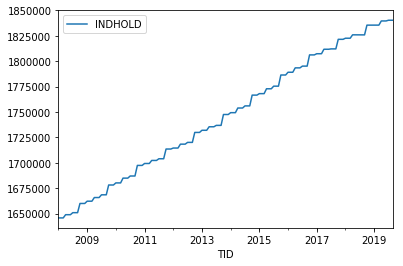

In [284]:
df_reg_pop[df_reg_pop.OMRÅDE == 'Region Hovedstaden'][['TID', 'INDHOLD']].set_index('TID').plot()

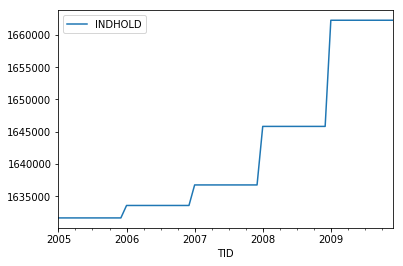

In [285]:
df_reg_pop_2[df_reg_pop_2.OMRÅDE == 'Region Hovedstaden'][['TID', 'INDHOLD']].set_index('TID').plot()

Correct ID

In [286]:
correct_id = global_id(geo='dk')
df_reg_pop_2 = df_reg_pop_2.merge(correct_id[['target', 'ID']], left_on = 'OMRÅDE', right_on = 'target', how = 'left')
df_reg_pop_2 =df_reg_pop_2[['TID', 'INDHOLD', 'ID']]

In [287]:
correct_id = global_id(geo='dk')
df_reg_pop = df_reg_pop.merge(correct_id[['target', 'ID']], left_on = 'OMRÅDE', right_on = 'target', how = 'left')
df_reg_pop =df_reg_pop[['TID', 'INDHOLD', 'ID']]

Shift the data 

In [288]:
df_reg_pop = df_reg_pop.rename(columns = {'TID': 'date', 'INDHOLD':'pop'})

In [289]:
df_reg_pop = df_reg_pop.sort_values(by = ['date']) 

In [290]:
df_reg_pop['pop'] = df_reg_pop.groupby(['ID'])['pop'].shift(1)

In [291]:
df_reg_pop_2 = df_reg_pop_2.rename(columns = {'TID': 'date', 'INDHOLD':'pop'})

In [292]:
df_reg_pop_2 = df_reg_pop_2.sort_values(by = ['date']) 

In [293]:
df_reg_pop_2['pop'] = df_reg_pop_2.groupby(['ID'])['pop'].shift(1)

In [294]:
df_reg_pop_2 = df_reg_pop_2[df_reg_pop_2['pop'].notnull()]
df_reg_pop = df_reg_pop[df_reg_pop['pop'].notnull()]

Concat the data 

In [295]:
df_reg_pop_2.date.min()

Timestamp('2005-02-01 00:00:00')

In [296]:
df_reg_pop.date.min()

Timestamp('2008-02-01 00:00:00')

In [297]:
df_reg_pop_2.date.max()

Timestamp('2009-12-01 00:00:00')

In [298]:
df_reg_pop.date.max()

Timestamp('2019-09-01 00:00:00')

In [299]:
df_reg_pop_2 = df_reg_pop_2[df_reg_pop_2.date < '2008-02-01']

In [300]:
df_reg_pop = pd.concat([df_reg_pop_2, df_reg_pop])

In [301]:
df_reg_pop.to_csv(r'data/other/df_reg_pop_new.csv', index = False)

### Mun population 

In [302]:
Dst.get_data(table_id = 'FOLK1A')

# Create dataframe
df_reg_pop = Dst.get_data(table_id = 'FOLK1A', variables={'OMRÅDE':['*'], 
                                                         'KØN': ['TOT'], 
                                                         'ALDER':['IALT'],
                                                         'CIVILSTAND':['TOT'],
                                                        'Tid': ['*']}) 

In [303]:
df_reg_pop = df_reg_pop.drop(['KØN', 'ALDER', 'CIVILSTAND'], axis = 1)

Merge on previous years

In [304]:
Dst.get_data(table_id = 'BEF1A07')

# Create dataframe
df_reg_pop_2 = Dst.get_data(table_id = 'BEF1A07', variables={'OMRÅDE':['*'], 
                                                             'KOEN': ['*'],
                                                             'CIVILSTAND': ['*'],
                                                             'ALDER': ['*'],
                                                             'Tid': ['*']}) 

In [305]:
df_reg_pop_2 = df_reg_pop_2.drop(['KOEN', 'ALDER', 'CIVILSTAND'], axis = 1)

In [306]:
df_reg_pop_2 = df_reg_pop_2.groupby(['OMRÅDE', 'TID']).sum().reset_index()

Correct date 

In [307]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    return(df)

In [308]:
df_reg_pop = quarter_to_month(df = df_reg_pop, date_variable = 'TID', orig_format = '%YQ%m', to_format = 'month', from_format = 'quarter', variable_names = [ 'OMRÅDE', 'TID', 'INDHOLD'], group_by = ['OMRÅDE', 'year'])

In [309]:
df_reg_pop_2 = quarter_to_month(df = df_reg_pop_2, date_variable = 'TID', orig_format = '%Y', to_format = 'month', from_format = 'year', variable_names = [ 'OMRÅDE', 'TID', 'INDHOLD'], group_by = ['OMRÅDE', 'year'])

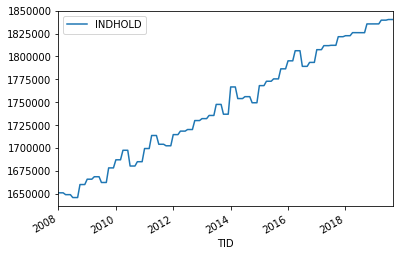

In [310]:
df_reg_pop[df_reg_pop.OMRÅDE == 'Region Hovedstaden'][['TID', 'INDHOLD']].set_index('TID').plot()

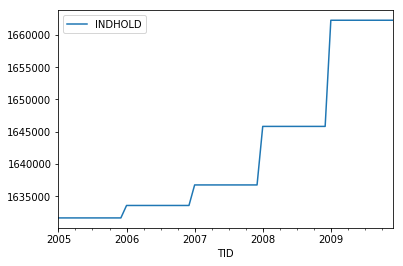

In [311]:
df_reg_pop_2[df_reg_pop_2.OMRÅDE == 'Region Hovedstaden'][['TID', 'INDHOLD']].set_index('TID').plot()

Correct ID

In [312]:
#correct_id = global_id(geo='dk')
#df_reg_pop_2 = df_reg_pop_2.merge(correct_id[['target', 'ID']], left_on = 'OMRÅDE', right_on = 'target', how = 'left')
#df_reg_pop_2 =df_reg_pop_2[['TID', 'INDHOLD', 'ID']]

In [313]:
#correct_id = global_id(geo='dk')
#df_reg_pop = df_reg_pop.merge(correct_id[['target', 'ID']], left_on = 'OMRÅDE', right_on = 'target', how = 'left')
#df_reg_pop =df_reg_pop[['TID', 'INDHOLD', 'ID']]

Shift the data 

In [314]:
df_reg_pop = df_reg_pop.rename(columns = {'TID': 'date', 'INDHOLD':'pop'})

In [315]:
df_reg_pop = df_reg_pop.sort_values(by = ['date']) 

In [316]:
df_reg_pop

,OMRÅDE,date,pop
1236,Kerteminde,2008-01-01,23668
2298,Ikast-Brande,2008-01-01,40138
2133,Skanderborg,2008-01-01,56308
3633,Region Hovedstaden,2008-01-01,1650985
1113,Odense,2008-01-01,186932
...,...,...,...
14651,Norddjurs,2019-09-01,37613
14654,Thisted,2019-09-01,43584
14657,Halsnæs,2019-09-01,31395
14636,Christiansø,2019-09-01,83


In [317]:
df_reg_pop['pop'] = df_reg_pop.groupby(['OMRÅDE'])['pop'].shift(1)

In [318]:
df_reg_pop_2 = df_reg_pop_2.rename(columns = {'TID': 'date', 'INDHOLD':'pop'})

In [319]:
df_reg_pop_2 = df_reg_pop_2.sort_values(by = ['date']) 

In [320]:
df_reg_pop_2['pop'] = df_reg_pop_2.groupby(['OMRÅDE'])['pop'].shift(1)

In [321]:
df_reg_pop_2 = df_reg_pop_2[df_reg_pop_2['pop'].notnull()]
df_reg_pop = df_reg_pop[df_reg_pop['pop'].notnull()]

Concat the data 

In [322]:
df_reg_pop_2.date.min()

Timestamp('2005-02-01 00:00:00')

In [323]:
df_reg_pop.date.min()

Timestamp('2008-02-01 00:00:00')

In [324]:
df_reg_pop_2.date.max()

Timestamp('2009-12-01 00:00:00')

In [325]:
df_reg_pop.date.max()

Timestamp('2019-09-01 00:00:00')

In [326]:
df_reg_pop_2 = df_reg_pop_2[df_reg_pop_2.date < '2008-02-01']

In [327]:
df_reg_pop = pd.concat([df_reg_pop_2, df_reg_pop])

remove regions

In [328]:
df_mun_pop = df_reg_pop[~df_reg_pop.OMRÅDE.isin(['Region Syddanmark', 'Region Midtjylland', 'Region Hovedstaden', 'Region Sjælland', 'Region Nordjylland', 'All Denmark'])]

In [329]:
df_mun_pop.to_csv(r'data/other/df_mun_pop_new.csv', index = False)

### OLD population statistics

Retrieve data 

In [52]:
# Retrieve 2007Q1
df_mun_pop_extra = Dst.get_data(table_id = 'BEV22', variables={'OMRÅDE':['*'], 
                                                             'BEVÆGELSE' : ['B01K'],
                                                             'KØN': ['*'], 
                                                             'Tid':['2007K2']}) 

In [53]:
df_mun_pop_extra['TID'] = "2007Q1"

In [54]:
# Concat 
df_mun_pop = pd.concat([df_mun_pop, df_mun_pop_extra])

In [55]:
df_mun_pop = df_mun_pop.groupby(['OMRÅDE', 'BEVÆGELSE', 'TID']).sum().reset_index()
df_mun_pop_temp = df_mun_pop.copy()

In [56]:
df_mun_pop= df_mun_pop.drop(['BEVÆGELSE'], axis=1)
df_mun_pop = df_mun_pop.sort_values(by=['OMRÅDE', "TID"])

Correct date format

In [57]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    return(df)

In [58]:
df_mun_pop = quarter_to_month(df = df_mun_pop, date_variable = 'TID', orig_format = '%YQ%m', to_format = 'month', from_format = 'quarter', variable_names = [ 'OMRÅDE', 'TID', 'INDHOLD'], group_by = ['OMRÅDE', 'year'])

Shift data correct (6 months)

In [59]:
mun = df_mun_pop.OMRÅDE.value_counts().index.tolist()
new_date = [datetime.datetime(2019, 7, 1),datetime.datetime(2019, 8, 1),datetime.datetime(2019, 9, 1)]

In [60]:
df= pd.DataFrame()

for m in mun:
    for new in new_date:
        df = df.append({'OMRÅDE': m, 'TID': new, 'INDHOLD': np.nan}, ignore_index=True)
df = df[['OMRÅDE','TID','INDHOLD']]

In [61]:
df_mun_pop = df_mun_pop.append(df)

In [62]:
df_mun_pop['INDHOLD']  = df_mun_pop.groupby(['OMRÅDE'])['INDHOLD'].shift(6)

In [63]:
df_mun_pop

,OMRÅDE,TID,INDHOLD
0,Aabenraa,2007-01-01,NaN
1,Aabenraa,2007-02-01,NaN
2,Aabenraa,2007-03-01,NaN
3,Aabenraa,2007-04-01,NaN
4,Aabenraa,2007-05-01,NaN
...,...,...,...
292,Brønderslev,2019-08-01,36339
293,Brønderslev,2019-09-01,36339
294,Holstebro,2019-07-01,58525
295,Holstebro,2019-08-01,58525


In [111]:
df_mun_pop.to_csv(r'data/other/df_mun_pop.csv', index = False)

Correct region format 

In [112]:
df_pop = df_mun_pop.merge(df_global_mun[['dst_name_en', 'ID']], left_on = 'OMRÅDE', right_on = 'dst_name_en', how = 'left')
df_pop = df_pop[['TID', 'INDHOLD', 'ID']]

In [113]:
df_pop = df_pop.groupby(['TID', 'ID']).sum().reset_index()

Check result

In [114]:
df_pop.shape

(765, 3)

In [115]:
df_mun_pop.shape

(15147, 3)

Save result

In [116]:
df_pop.to_csv(r'data/other/df_reg_pop.csv', index = False)

#### Regional average age - skipped

GALDER: Average age 1. January by municipality and sex (2005-2019)

In [131]:
Dst.get_data(table_id = 'GALDER')

# Create dataframe
df_reg_avg_age = Dst.get_data(table_id = 'GALDER', variables={'KOMK':['081', '082', '083', '084', '085'], 
                                                             'KØN': ['TOT'], 
                                                             'TID':['*']}) 

df_reg_avg_age= df_reg_avg_age.drop(['KØN'], axis=1)

Correct Region format

In [132]:
correct_id = global_id(geo='dk')
df_reg_avg_age = df_reg_avg_age.merge(correct_id[['target', 'ID']], left_on = 'KOMK', right_on = 'target', how = 'left')
df_reg_avg_age = df_reg_avg_age[['TID', 'INDHOLD', 'ID']]

Correct date format 

In [133]:
df_reg_avg_age = df_reg_avg_age.drop_duplicates()

In [134]:
df_reg_avg_age = quarter_to_month(df = df_reg_avg_age, date_variable = 'TID', orig_format = '%Y', to_format = 'month', from_format = 'year', variable_names = [ 'TID', 'INDHOLD', 'ID'])

In [135]:
df_reg_avg_age =df_reg_avg_age.rename(columns={"TID": "date", "INDHOLD": "avg_age"})
df_reg_avg_age.head()

,date,avg_age,ID
0,2005-01-01,40.2,North Denmark
1,2005-02-01,40.2,North Denmark
2,2005-03-01,40.2,North Denmark
3,2005-04-01,40.2,North Denmark
4,2005-05-01,40.2,North Denmark


Shift data correct

In [1687]:
df_reg_avg_age['avg_age']  = df_reg_avg_age.groupby(['ID'])['avg_age'].shift(3)

Save result 

In [1688]:
df_reg_avg_age.to_csv(r'data/other/df_reg_avg_age.csv', index = False)

### Regional population

BEV22: Summary vital statistics (provisional data) by region, type of movement and sex (2007Q2-2019Q2)

In [117]:
Dst.get_data(table_id = 'BEV22')

# Create dataframe
df_mun_pop_growth = Dst.get_data(table_id = 'BEV22', variables={'OMRÅDE':['*'], 
                                                             'BEVÆGELSE' : ['B11'],
                                                             'KØN': ['*'], 
                                                             'Tid':['*']}) 


In [118]:
df_mun_pop_growth = df_mun_pop_growth.groupby(['OMRÅDE', 'BEVÆGELSE', 'TID']).sum().reset_index()
df_mun_pop_growth= df_mun_pop_growth.drop(['BEVÆGELSE'], axis=1)
df_mun_pop_growth = df_mun_pop_growth.sort_values(by=['OMRÅDE', "TID"])

In [119]:
df_mun_pop_growth = quarter_to_month(df = df_mun_pop_growth, date_variable = 'TID', orig_format = '%YQ%m', to_format = 'month', from_format = 'quarter', variable_names = [ 'OMRÅDE', 'TID', 'INDHOLD'], group_by = ['OMRÅDE', 'year'])

Correct region format 

In [120]:
df_pop_growth = df_mun_pop_growth.merge(df_global_mun[['dst_name', 'ID']], left_on = 'OMRÅDE', right_on = 'dst_name', how = 'left')
df_pop_growth = df_pop_growth[['TID', 'INDHOLD', 'ID']]
df_pop_growth = df_pop_growth.groupby(['TID', 'ID']).sum().reset_index()

Correct shift (6 months)

In [121]:
df_pop_growth.TID.max()

Timestamp('2019-06-01 00:00:00')

In [122]:
list(df_pop_growth)

['TID', 'ID', 'INDHOLD']

In [123]:
mun = df_pop_growth.ID.value_counts().index.tolist()
new_date = [datetime.datetime(2019, 7, 1),datetime.datetime(2019, 8, 1),datetime.datetime(2019, 9, 1)]

In [124]:
df= pd.DataFrame()

for m in mun:
    for new in new_date:
        df = df.append({'ID': m, 'TID': new, 'INDHOLD': np.nan}, ignore_index=True)
df = df[['TID','ID', 'INDHOLD']]

In [125]:
df_pop_growth = df_pop_growth.append(df)

In [126]:
df_pop_growth['INDHOLD']  = df_pop_growth.groupby(['ID'])['INDHOLD'].shift(6)

In [127]:
df_pop_growth.to_csv(r'data/other/df_pop_growth.csv', index = False)

### Share of population in labour force 

Retrieve labour force 

In [330]:
## choose language 
Dst = pydst.Dst(lang='en')

# Request table with relevant parameters
# https://www.dst.dk/da/Statistik/statistikbanken/api
Dst.get_data(table_id = 'AUS08')

# Seasonally adjusted figures in percent of the labour force
# Create dataframe
df_labour_force = Dst.get_data(table_id = 'AUS08', variables={'OMRÅDE':['081', '082', '083', '084', '085'], 'TID':['*'], 'SAESONFAK': ['22']}) 

df_labour_force_2 = Dst.get_data(table_id = 'AUS08', variables={'OMRÅDE':['081', '082', '083', '084', '085'], 'TID':['*'], 'SAESONFAK': ['24']}) 

In [331]:
df_labour_force = df_labour_force.drop(['SAESONFAK'], axis=1)
df_labour_force_2 = df_labour_force_2.drop(['SAESONFAK'], axis=1)

Left join

In [332]:
df_labour_force = df_labour_force.merge(df_labour_force_2, on = ['TID', 'OMRÅDE'])

In [333]:
df_labour_force = df_labour_force.rename(columns = {'INDHOLD_x': 'unemp', 'INDHOLD_y': 'actual', 'TID': 'date'})

Get full unemployment

In [334]:
df_labour_force['labour_force'] = df_labour_force['actual'] / df_labour_force['unemp'] * 100
df_labour_force['labour_force'] = df_labour_force['labour_force'].round(2)

In [335]:
df_labour_force = df_labour_force.drop(['actual', 'unemp'], axis = 1 )

Correct ID

In [336]:
correct_id = global_id(geo='dk')
df_labour_force = df_labour_force.merge(correct_id, left_on = 'OMRÅDE', right_on = 'target', how = 'left')
df_labour_force = df_labour_force[['OMRÅDE', 'date', 'labour_force', 'ID']]

In [337]:
df_labour_force = df_labour_force.drop(['OMRÅDE'], axis = 1 )

Correct date 

In [338]:
df_labour_force['date'] = pd.to_datetime(df_labour_force['date'], format='%YM%m')

In [339]:
df_labour_force.to_csv(r'data/other/df_labour_force_new.csv', index = False)

In [340]:
df_labour_force.date.max()

Timestamp('2019-09-01 00:00:00')

In [341]:
df_labour_force.date.min()

Timestamp('2007-01-01 00:00:00')

Shift the data

In [342]:
df_labour_force = df_labour_force.sort_values(by = ['date'])

In [343]:
df_labour_force['labour_force'] = df_labour_force.groupby(['ID'])['labour_force'].shift(1)

In [344]:
df_labour_force.to_csv(r'data/other/df_labour_force_new.csv', index = False)
df_labour_force.to_csv(r'DK/data/df_labour_force_DK.csv', index = False)

Load in regional population 

In [346]:
df_reg_pop = pd.read_csv('data/other/df_reg_pop_new.csv', sep = ',',  parse_dates = ['date'])

In [348]:
df_reg_pop_share = df_labour_force.merge(df_reg_pop, right_on = ['ID', 'date'], left_on = ['ID', 'date'])

In [33]:
#df_reg_pop_share = df_reg_pop_share.drop(['TID'], axis = 1)

In [350]:
df_reg_pop_share =df_reg_pop_share[df_reg_pop_share['labour_force'].notnull()]

In [351]:
df_reg_pop_share

,date,labour_force,ID,pop
5,2007-02-01,288060.32,North Denmark,576972
6,2007-02-01,589597.83,Southern Denmark,1189817
7,2007-02-01,873200.00,Capital,1636749
8,2007-02-01,407458.70,Zealand,816118
9,2007-02-01,645957.50,Central Denmark,1227428
...,...,...,...,...
760,2019-09-01,283102.50,North Denmark,589731
761,2019-09-01,647362.86,Central Denmark,1323137
762,2019-09-01,573471.43,Southern Denmark,1223879
763,2019-09-01,386784.85,Zealand,837357


In [354]:
df_reg_pop_share['labour_force_share'] =  df_reg_pop_share['labour_force'] / df_reg_pop_share['pop'] * 100

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [355]:
df_reg_pop_share = df_reg_pop_share[['ID', 'date', 'labour_force_share']]

In [356]:
df_reg_pop_share = df_reg_pop_share.sort_values(by = ['date'])

In [357]:
df_reg_pop_share.head(20)

,ID,date,labour_force_share
5,North Denmark,2007-02-01,49.926222
6,Southern Denmark,2007-02-01,49.553657
7,Capital,2007-02-01,53.349658
8,Zealand,2007-02-01,49.926444
9,Central Denmark,2007-02-01,52.626916
10,North Denmark,2007-03-01,50.613085
11,Southern Denmark,2007-03-01,49.904542
12,Capital,2007-03-01,53.111508
13,Zealand,2007-03-01,50.288752
14,Central Denmark,2007-03-01,52.828482


In [358]:
df_reg_pop_share.to_csv(r'data/other/df_reg_pop_share.csv', index = False)

In [359]:
df_reg_pop_share.date.max()

Timestamp('2019-09-01 00:00:00')

### OLD Labour force 

In [29]:
df_labour_force = pd.read_csv("data/other/df_DK_labour_force.csv", parse_dates = ['date'])

Concat 2007 value

In [176]:
df_labour_force_2007 = pd.read_csv('data/other/df_labour_force_2007.csv', sep = ';',  parse_dates = ['date'])

In [177]:
df_labour_force = pd.concat([df_labour_force, df_labour_force_2007]) 

In [178]:
df_labour_force = df_labour_force.sort_values(by=['ID', 'date'])

Shift the data 

In [179]:
df_labour_force = quarter_to_month(df =df_labour_force, date_variable = 'date', orig_format = '%Y-%m-%d', to_format = 'month', from_format = 'quarter', variable_names = [ 'date', 'labour_force', 'ID'])

In [180]:
reg = df_labour_force.ID.value_counts().index.tolist()
new_date = [datetime.datetime(2019, 7, 1),datetime.datetime(2019, 8, 1),datetime.datetime(2019, 9, 1)]

In [181]:
df= pd.DataFrame()

for r in reg:
    for new in new_date:
        df = df.append({'ID': r, 'date': new, 'labour_force': np.nan}, ignore_index=True)
df = df[['date','labour_force','ID']]

In [182]:
df_labour_force = df_labour_force.append(df)

In [183]:
df_labour_force['labour_force'] = df_labour_force.groupby(['ID'])['labour_force'].shift(6)

In [185]:
df_labour_force.to_csv(r'data/other/df_labour_force.csv', index = False)

### Income  (Deleted)

### Education

Includes: 
1. Share of population with MVU or LVU

HFUDD10: EDUCATIONAL ATTAINMENT (15-69 YEARS) BY REGION, ANCESTRY, HIGHEST EDUCATION COMPLETED, AGE AND SEX (2006 - 2019)

In [360]:
Dst.get_data(table_id = 'HFUDD10')

# Create dataframe
df_reg_edu = Dst.get_data(table_id = 'HFUDD10', variables={'BOPOMR':['081', '082', '083', '084', '085'],
                                                             'HFUDD': ['H50', 'H60', 'H70'],
                                                               'HERKOMST': ['TOT'],
                                                             'ALDER' : ['TOT'],
                                                             'KØN': ['TOT'],  
                                                             'Tid':['*']}) 

df_reg_edu= df_reg_edu.drop(['KØN', 'ALDER', 'HERKOMST'], axis=1)

Correct ID variable

In [361]:
correct_id = global_id(geo='dk')
df_reg_edu = df_reg_edu.merge(correct_id, left_on = 'BOPOMR', right_on = 'target', how = 'left')
df_reg_edu = df_reg_edu[['HFUDD', 'TID', 'INDHOLD', 'ID']]

Add together MVU and LVU 

In [362]:
df_reg_edu = df_reg_edu.groupby(['TID', 'ID']).sum().reset_index()

Correct time variable

In [363]:
df_reg_edu['TID'] = pd.to_datetime(df_reg_edu.TID, format='%Y')

In [364]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    elif (from_format == 'year' and to_format == 'quarter'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    
    if (from_format == 'year' and to_format == 'quarter'):
        df = df[df['date'].map(lambda x: x.month).isin([1, 4, 7, 10])]
       
    return(df)

In [365]:
df_reg_edu = quarter_to_month(df = df_reg_edu, date_variable = 'TID', orig_format = '%Y', to_format = 'month', from_format = 'year', variable_names = [ 'TID', 'ID', 'INDHOLD'])

In [366]:
df_reg_edu.TID.max()

Timestamp('2019-12-01 00:00:00')

Correct shift (6 months )

In [367]:
df_reg_edu['INDHOLD'] = df_reg_edu.groupby(['ID'])['INDHOLD'].shift(6)

Load in regional population 

In [369]:
df_reg_pop = pd.read_csv('data/other/df_reg_pop_new.csv', sep = ',',  parse_dates = ['date'])

In [375]:
df_reg_edu

,TID,ID,INDHOLD,date,pop
0,2006-01-01,Capital,NaN,2006-01-01,1631635
1,2006-02-01,Capital,NaN,2006-02-01,1633565
2,2006-03-01,Capital,NaN,2006-03-01,1633565
3,2006-04-01,Capital,NaN,2006-04-01,1633565
4,2006-05-01,Capital,NaN,2006-05-01,1633565
...,...,...,...,...,...
820,2019-05-01,Zealand,113548,2019-05-01,836675
821,2019-06-01,Zealand,113548,2019-06-01,836675
822,2019-07-01,Zealand,115866,2019-07-01,836675
823,2019-08-01,Zealand,115866,2019-08-01,837357


In [374]:
df_reg_edu = df_reg_edu.merge(df_reg_pop, right_on = ['ID', 'date'], left_on = ['ID', 'TID'])

In [376]:
df_reg_edu = df_reg_edu.rename(columns = {'INDHOLD' : 'mvu_lvu', 'pop' : 'reg_pop'})

In [377]:
df_reg_edu = df_reg_edu[~(df_reg_edu['reg_pop'] == 0)]

In [378]:
df_reg_edu['mvu_lvu_share_pop'] = df_reg_edu['mvu_lvu'] / df_reg_edu['reg_pop']*100

In [379]:
df_reg_edu.tail()

,TID,ID,mvu_lvu,date,reg_pop,mvu_lvu_share_pop
820,2019-05-01,Zealand,113548,2019-05-01,836675,13.5713
821,2019-06-01,Zealand,113548,2019-06-01,836675,13.5713
822,2019-07-01,Zealand,115866,2019-07-01,836675,13.8484
823,2019-08-01,Zealand,115866,2019-08-01,837357,13.8371
824,2019-09-01,Zealand,115866,2019-09-01,837357,13.8371


In [380]:
df_reg_edu = df_reg_edu[['TID', 'ID','mvu_lvu_share_pop']]

Save

In [381]:
df_reg_edu.to_csv(r'data/other/df_reg_edu.csv', index = False)

In [383]:
df_reg_edu.TID.max()

Timestamp('2019-09-01 00:00:00')

### Socioeconomic status

Includes: 
1. Regional socialeconomic index
1. Share of population in labour force


### Socialeconomic index

In [384]:
df_socio = pd.read_csv('data/other/df_socio_raw.csv', sep = ";")

In [386]:
df_socio = pd.wide_to_long(df_socio, ["Y"], i=["komnr", "kom"], j="date").reset_index()

In [387]:
df_socio = df_socio.rename(columns = {'Y': 'socio_index'})

In [388]:
df_kom_reg = pd.read_csv('data/other/df_kom_reg.csv', sep = ";")

In [389]:
df_kom_reg['kommune'] =  [int(x[:3]) for x in df_kom_reg['kommune']]
df_kom_reg['region'] =  [x[4:] for x in df_kom_reg['region']]

In [390]:
df_socio = df_socio.merge(df_kom_reg, right_on = 'kommune', left_on = "komnr", how = 'left')
df_socio['region'] = 'Region' + df_socio['region']

In [391]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    return(df)

In [392]:
df_socio = df_socio[['date', 'socio_index', 'komnr', 'region']].drop_duplicates()
df_socio = quarter_to_month(df = df_socio, date_variable = 'date', orig_format = '%Y', to_format = 'month', from_format = 'year', variable_names = ['date', 'socio_index', 'komnr', 'region'],  group_by = ['komnr','year'])

In [393]:
correct_id = global_id(geo='dk')
df_socio = df_socio.merge(correct_id, left_on = 'region', right_on = 'target', how = 'left')
df_socio = df_socio[['date', 'socio_index', 'ID', 'komnr']]

Incoporate correct lag (8 months lead)

In [394]:
df_socio['socio_index']  = df_socio.groupby(['ID'])['socio_index'].shift(8)

Load in population

In [396]:
df_mun_pop = pd.read_csv('data/other/df_mun_pop_new.csv', sep = ',',  parse_dates = ['date'])

In [397]:
df_global_mun_reg = pd.read_csv('data/other/df_global_mun_reg.csv', sep = ",")

In [398]:
df_socio  = df_socio.merge(df_global_mun_reg[['Kom.nr', 'dst_name_en']], left_on = 'komnr', right_on = 'Kom.nr', how = 'left')

In [400]:
df_socio = df_mun_pop.merge(df_socio, left_on = ['OMRÅDE', 'date'], right_on =  ['dst_name_en', 'date'], how = 'left')

In [403]:
df_socio  =df_socio[['date', 'dst_name_en', 'socio_index', 'pop', 'ID']]

In [404]:
df_socio = df_socio.rename(columns = {'pop' : 'popu'})

In [405]:
df_socio = df_socio[df_socio.date.notnull()]
df_socio = df_socio[df_socio.popu.notnull()]

In [406]:
df_socio['socio_index']= df_socio['socio_index'].str.replace(',','.')

Calculate weigthed average

In [407]:
cols = ['popu', 'socio_index']
df_socio[cols] = df_socio[cols].apply(pd.to_numeric, errors='coerce', axis = 1)

In [408]:
#[x * y for x in df_socio.socio_index for y in df_socio.popu]

In [409]:
def my_agg(x):
    names = {'w_ave_socio_index': (x['socio_index'] * x['popu']).sum()/x['popu'].sum()}
    return pd.Series(names, index=['w_ave_socio_index'])

In [410]:
df_socio[['socio_index', 'popu']] = df_socio[['socio_index', 'popu']].apply(pd.to_numeric, errors='coerce', axis = 1)

In [411]:
df_socio = df_socio.groupby(['date', 'ID']).apply(my_agg).reset_index()

In [412]:
df_socio.tail()

,date,ID,w_ave_socio_index
820,2019-09-01,Capital,1.000451
821,2019-09-01,Central Denmark,0.918964
822,2019-09-01,North Denmark,0.985923
823,2019-09-01,Southern Denmark,1.054024
824,2019-09-01,Zealand,1.063554


Save the result

In [413]:
df_socio.to_csv(r'data/other/df_socio.csv', index = False)

### Urbanisation

Includes: 
1. Share of population in city

Urbanisation 

In [490]:
df_urban = pd.read_csv('data/other/df_urbanisation.csv', sep=";")

In [491]:
df_urban

,Unnamed: 0,Kom.nr,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Københavns Kommune,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,Frederiksberg Kommune,147,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,Ballerup Kommune,151,"99,5","99,5","99,5","99,5","99,5","99,5","99,5","99,4","99,5","99,5","99,5","99,5","99,5","99,5"
3,Brøndby Kommune,153,100,100,100,100,"99,8","99,8","99,9","99,9","99,9","99,9","99,9","99,9","99,8","99,8"
4,Dragør Kommune,155,"98,1","98,1","98,2","98,3","98,3","98,2","97,9","97,9","97,8","97,5","97,7","97,4","97,3","97,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Rebild Kommune,840,"63,4","63,9","65,1","65,6",66,"65,5","65,5","65,2","65,9","66,9","67,4","67,9","67,9","68,5"
94,Mariagerfjord Kommune,846,"73,5","74,4","73,9","74,5","74,7","75,2","75,7","76,1","76,1","76,2","76,4","76,5","77,1","77,1"
95,Jammerbugt Kommune,849,"71,5","72,3","72,4","72,5","73,6","73,8","74,1","74,2","74,3","74,6","74,8","74,8","74,6","74,7"
96,Aalborg Kommune,851,"91,5","91,5","91,4","91,7","91,9",92,92,"92,2","92,3","92,3","92,4","92,4","92,5","92,8"


Wide to long

In [492]:
df_urban = pd.wide_to_long(df_urban, ['Y'], i=["Kom.nr", 'Unnamed: 0'], j="date").reset_index()

In [493]:
df_urban.rename(columns = {'Unnamed: 0': 'kom', 'Y' : 'urban_index'}, inplace=True)

In [494]:
df_urban['urban_index'] = df_urban['urban_index'].str.replace(',','.')

Correct date format

In [495]:
df_urban = df_urban.drop_duplicates()
df_urban = quarter_to_month(df = df_urban, orig_format = '%Y', to_format = 'month', from_format = 'year', variable_names = ['Kom.nr', 'kom', 'date', 'urban_index'],  group_by = ['kom','year'])

In [496]:
df_urban.date.max()

Timestamp('2019-12-01 00:00:00')

In [497]:
df_urban.date.min()

Timestamp('2006-01-01 00:00:00')

Shift 4 months

In [498]:
df_urban['urban_index']  = df_urban.groupby(['Kom.nr'])['urban_index'].shift(4)

Load in population

In [499]:
df_mun_pop = pd.read_csv('data/other/df_mun_pop_new.csv', sep = ',',  parse_dates = ['date'])

In [501]:
df_urban = df_urban.merge(df_global_mun_reg[['Kom.nr', 'dst_name_en']], left_on = 'Kom.nr', right_on = 'Kom.nr', how = 'left')

In [504]:
df_urban = df_mun_pop.merge(df_urban, left_on = ['OMRÅDE', 'date'], right_on =  ['dst_name_en', 'date'], how = 'left')

In [505]:
df_urban

,OMRÅDE,date,pop,Kom.nr,kom,urban_index,dst_name_en
0,Nordfyns,2005-02-01,28655,NaN,NaN,NaN,NaN
1,Norddjurs,2005-02-01,38349,NaN,NaN,NaN,NaN
2,Holbæk,2005-02-01,66611,NaN,NaN,NaN,NaN
3,Allerød,2005-02-01,23458,NaN,NaN,NaN,NaN
4,Brøndby,2005-02-01,34513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17419,Norddjurs,2019-09-01,37613,707,Norddjurs Kommune,73.8,Norddjurs
17420,Thisted,2019-09-01,43584,787,Thisted Kommune,70.4,Thisted
17421,Halsnæs,2019-09-01,31395,260,Halsnæs Kommune,91.4,Halsnæs
17422,Christiansø,2019-09-01,83,NaN,NaN,NaN,NaN


In [506]:
df_urban  =df_urban[['date', 'Kom.nr', 'urban_index', 'pop']]

In [507]:
df_urban = df_urban[df_urban.date.notnull()]
df_urban = df_urban[df_urban['pop'].notnull()]

Calculate weigthed average

In [508]:
def my_agg(x):
    names = {'w_ave_urban_index': (x['urban_index'] * x['pop']).sum()/x['pop'].sum()}
    return pd.Series(names, index=['w_ave_urban_index'])

Correct region format 

In [509]:
df_global_mun_reg = pd.read_csv('data/other/df_global_mun_reg.csv', sep = ',')

In [510]:
df_urban = df_urban.merge(df_global_mun_reg[['Kom.nr', 'ID']], left_on = 'Kom.nr', right_on = 'Kom.nr', how = 'left')
df_urban =df_urban.drop_duplicates()

In [511]:
df_urban['urban_index'] = df_urban['urban_index'].apply(pd.to_numeric, errors='coerce')

In [512]:
df_urban = df_urban.drop(['Kom.nr'], axis = 1)

In [513]:
df_urban = df_urban.groupby(['ID', 'date']).apply(my_agg).reset_index()

In [514]:
df_urban.head()

,ID,date,w_ave_urban_index
0,Capital,2006-01-01,0.000000
1,Capital,2006-02-01,0.000000
2,Capital,2006-03-01,0.000000
3,Capital,2006-04-01,0.000000
4,Capital,2006-05-01,97.100111


Save

In [515]:
df_urban.to_csv(r'data/other/df_urban.csv', index = False)

### Result dataframe

Includes:
1. Population
1. Average age
1. population growth
1. labour force share of population
1. share of population with MVU or LVU
1. Socio
1. Urbanisation


Load relevant data frames

In [541]:
df_reg_pop = pd.read_csv('data/other/df_reg_pop_new.csv', sep=",")
df_reg_edu = pd.read_csv('data/other/df_reg_edu.csv', sep=",")
df_pop_growth = pd.read_csv('data/other/df_pop_growth.csv', sep=",")
df_reg_pop_share = pd.read_csv('data/other/df_reg_pop_share.csv', sep=",")
df_socio = pd.read_csv('data/other/df_socio.csv', sep=",")
df_urban = pd.read_csv('data/other/df_urban.csv', sep=",")

Merge the results

In [542]:
df_reg_pop = df_reg_pop.rename(columns = {'INDHOLD': 'pop', 'TID': 'date'})
df_reg_pop.shape

(880, 3)

In [543]:
#df_pop_growth = df_pop_growth.rename(columns = {'INDHOLD': 'pop_growth', 'TID': 'date'})
#result = result.merge(df_pop_growth, on = ['date', 'ID'], how = 'left')

In [544]:
#result.shape

In [545]:
df_reg_edu = df_reg_edu.rename(columns = {'TID': 'date'})

In [546]:
result = df_reg_pop.merge(df_reg_edu, on = ['date', 'ID'], how = 'left')

In [547]:
result.shape

(880, 4)

In [548]:
df_reg_pop_share = df_reg_pop_share.rename(columns = {'TID': 'date'})
result = result.merge(df_reg_pop_share, on = ['date', 'ID'], how = 'left')

In [549]:
result.shape

(880, 5)

In [550]:
result = result.merge(df_socio, on = ['date', 'ID'], how = 'left')

In [551]:
result.shape

(880, 6)

In [552]:
result = result.merge(df_urban, on = ['date', 'ID'], how = 'left')

In [553]:
result.shape

(880, 7)

In [559]:
result = result[result.mvu_lvu_share_pop.notnull()]
result = result[result.w_ave_urban_index.notnull()]
result = result[result.labour_force_share.notnull()]
result = result[~(result['pop'] == 0)]

In [560]:
result.date.min()

'2007-02-01'

In [561]:
result.date.max()

'2019-09-01'

Save the result

In [565]:
result.to_csv(r'DK/data//df_controls.csv', index = False)

In [563]:
result

,date,pop,ID,mvu_lvu_share_pop,labour_force_share,w_ave_socio_index,w_ave_urban_index
120,2007-02-01,1189817,Southern Denmark,11.347711,49.553657,1.028618,81.954235
121,2007-02-01,1636749,Capital,18.111390,53.349658,1.022836,97.098576
122,2007-02-01,576972,North Denmark,11.066395,49.926222,0.927014,78.977670
123,2007-02-01,1227428,Central Denmark,12.915462,52.626916,0.963735,83.054526
124,2007-02-01,816118,Zealand,11.064331,49.926444,1.025331,79.010224
...,...,...,...,...,...,...,...
875,2019-09-01,1223879,Southern Denmark,15.312053,46.856873,1.054024,84.237017
876,2019-09-01,589731,North Denmark,15.210664,48.005362,0.985923,81.629067
877,2019-09-01,1840357,Capital,25.136210,51.339438,1.000451,97.594630
878,2019-09-01,1323137,Central Denmark,17.732102,48.926367,0.918964,85.559032


## SE

Population

In [1810]:
url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101A/BefolkningNy'

In [1811]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionLän07",
        "values": [
          "01",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "12",
          "13",
          "14",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "BE0101N1"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1812]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1813]:
# Save to CSV
text_file = open("data/other/df_se_pop.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1814]:
# Open the csv file 
df_se_pop = pd.read_csv("data/other/df_se_pop.csv") 

In [1815]:
df_se_pop = pd.wide_to_long(df_se_pop, ["Population "], i=["region"], j="date").reset_index()
df_se_pop = df_se_pop.rename(columns = {'Population ': 'pop'})

In [1816]:
df_se_pop['reg_nr'] = [x[:2] for x in df_se_pop['region']]
df_se_pop['ID'] = [x[3:] for x in df_se_pop['region']]

Correct ID

In [1817]:
df_se_pop['ID'] = [x[:-7] for x in df_se_pop['ID']]

In [1818]:
df_se_pop = df_se_pop.drop('region', axis = 1)

Correct date format

In [1819]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    elif (from_format == 'year' and to_format == 'quarter'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    
    if (from_format == 'year' and to_format == 'quarter'):
        df = df[df['date'].map(lambda x: x.month).isin([1, 4, 7, 10])]
       
    return(df)

In [1820]:
df_se_pop = quarter_to_month(df = df_se_pop, date_variable = 'date', orig_format = '%Y', to_format = 'quarter', from_format = 'year', variable_names = ['date', 'pop', 'reg_nr', 'ID'], group_by = ['ID','date'])

In [1821]:
df_se_pop

,date,pop,reg_nr,ID
0,1968-01-01,1427236,01,Stockholm
3,1968-04-01,1427236,01,Stockholm
6,1968-07-01,1427236,01,Stockholm
9,1968-10-01,1427236,01,Stockholm
12,1968-01-01,209521,03,Uppsala
...,...,...,...,...
12837,2018-10-01,270154,24,Västerbotten
12840,2018-01-01,250497,25,Norrbotten
12843,2018-04-01,250497,25,Norrbotten
12846,2018-07-01,250497,25,Norrbotten


#### Labour force share

In [1822]:
url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/AM/AM0401/AM0401N/NAKUBefolkningLK'

In [1823]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionLän99EjAggr",
        "values": [
          "01",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "12",
          "13",
          "14",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25"
        ]
      }
    },
    {
      "code": "Arbetskraftstillh",
      "selection": {
        "filter": "item",
        "values": [
          "ALÖS",
          "SYS"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1+2"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "AM0401VB"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1824]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1825]:
# Save to CSV
text_file = open("data/other/df_se_labour_force.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1826]:
# Open the csv file 
df_se_lf_share = pd.read_csv("data/other/df_se_labour_force.csv") 

In [1827]:
df_se_lf_share = df_se_lf_share.groupby('region').sum().reset_index()

In [1828]:
df_se_lf_share =pd.melt(df_se_lf_share, id_vars=['region'], value_vars=['Percent 2005K2', 'Percent 2005K3', 'Percent 2005K4',
       'Percent 2006K1', 'Percent 2006K2', 'Percent 2006K3', 'Percent 2006K4',
       'Percent 2007K1', 'Percent 2007K2', 'Percent 2007K3', 'Percent 2007K4',
       'Percent 2008K1', 'Percent 2008K2', 'Percent 2008K3', 'Percent 2008K4',
       'Percent 2009K1', 'Percent 2009K2', 'Percent 2009K3', 'Percent 2009K4',
       'Percent 2010K1', 'Percent 2010K2', 'Percent 2010K3', 'Percent 2010K4',
       'Percent 2011K1', 'Percent 2011K2', 'Percent 2011K3', 'Percent 2011K4',
       'Percent 2012K1', 'Percent 2012K2', 'Percent 2012K3', 'Percent 2012K4',
       'Percent 2013K1', 'Percent 2013K2', 'Percent 2013K3', 'Percent 2013K4',
       'Percent 2014K1', 'Percent 2014K2', 'Percent 2014K3', 'Percent 2014K4',
       'Percent 2015K1', 'Percent 2015K2', 'Percent 2015K3', 'Percent 2015K4',
       'Percent 2016K1', 'Percent 2016K2', 'Percent 2016K3', 'Percent 2016K4',
       'Percent 2017K1', 'Percent 2017K2', 'Percent 2017K3', 'Percent 2017K4',
       'Percent 2018K1', 'Percent 2018K2', 'Percent 2018K3', 'Percent 2018K4',
       'Percent 2019K1', 'Percent 2019K2', 'Percent 2019K3'])

In [1829]:
df_se_lf_share = df_se_lf_share.rename(columns = {'value': 'labour_force_share'})

In [1830]:
df_se_lf_share['reg_nr'] = [x[:2] for x in df_se_lf_share['region']]
df_se_lf_share['ID'] = [x[3:] for x in df_se_lf_share['region']]

Correct ID

In [1831]:
df_se_lf_share['ID'] = [x[:-7] for x in df_se_lf_share['ID']]

In [1832]:
df_se_lf_share = df_se_lf_share.drop('region', axis = 1)

Correct date format

In [1833]:
df_se_lf_share['date'] = [x[8:] for x in df_se_lf_share['variable']]

In [1834]:
df_se_lf_share = df_se_lf_share.drop('variable', axis = 1)

In [1835]:
df_se_lf_share = quarter_to_month(df = df_se_lf_share, date_variable = 'date', orig_format = '%YK%m', to_format = 'month', from_format = 'quarter', variable_names = ['labour_force_share','reg_nr','ID','date'], group_by = ['ID','year'])
df_se_lf_share = df_se_lf_share[df_se_lf_share['date'].map(lambda x: x.month).isin([1, 4, 7, 10])]

In [1836]:
df_se_lf_share

,labour_force_share,reg_nr,ID,date
0,76.6,01,Stockholm,2005-01-01
3,76.6,03,Uppsala,2005-01-01
6,70.4,04,Södermanland,2005-01-01
9,72.2,05,Östergötland,2005-01-01
12,75.7,06,Jönköping,2005-01-01
...,...,...,...,...
3639,72.7,21,Gävleborg,2019-07-01
3642,72.3,22,Västernorrland,2019-07-01
3645,73.2,23,Jämtland,2019-07-01
3648,72.8,24,Västerbotten,2019-07-01


### MVU and LVU

In [3]:
url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/UF/UF0506/Utbildning'

In [4]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionLän07",
        "values": [
          "01",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "12",
          "13",
          "14",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25"
        ]
      }
    },
    {
      "code": "UtbildningsNiva",
      "selection": {
        "filter": "item",
        "values": [
          "5",
          "6",
          "7"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [5]:
# request data
r = requests.post(url, json = params)
r= r.text

In [6]:
# Save to CSV
text_file = open("data/other/df_se_mvu_lvu.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [7]:
# Open the csv file 
df_se_mvu_lvu = pd.read_csv("data/other/df_se_mvu_lvu.csv") 

In [10]:
df_se_mvu_lvu['level of education'].value_counts()

post-graduate education (ISCED97 6)                           21
post-secondary education 3 years or more (ISCED97 5A)         21
post-secondary education, less than 3 years (ISCED97 4+5B)    21
Name: level of education, dtype: int64

In [1843]:
df_se_mvu_lvu = df_se_mvu_lvu.groupby('region').sum().reset_index()

In [1844]:
df_se_mvu_lvu = pd.wide_to_long(df_se_mvu_lvu, ["Population "], i=["region"], j="date").reset_index()

In [1845]:
df_se_mvu_lvu = df_se_mvu_lvu.rename(columns = {'Population ': 'mvu_lvu'})

In [1846]:
df_se_mvu_lvu['reg_nr'] = [x[:2] for x in df_se_mvu_lvu['region']]
df_se_mvu_lvu['ID'] = [x[3:] for x in df_se_mvu_lvu['region']]

Correct ID

In [1847]:
df_se_mvu_lvu['ID'] = [x[:-7] for x in df_se_mvu_lvu['ID']]

In [1848]:
df_se_mvu_lvu = df_se_mvu_lvu.drop('region', axis = 1)

Correct date

In [1849]:
df_se_mvu_lvu = quarter_to_month(df = df_se_mvu_lvu, date_variable = 'date', orig_format = '%Y', to_format = 'quarter', from_format = 'year', variable_names = ['date', 'mvu_lvu', 'reg_nr', 'ID'], group_by = ['ID','date'])

Merge on population to get share

In [1851]:
df_se_mvu_lvu= df_se_mvu_lvu.merge(df_se_pop, on = ['date', 'ID', 'reg_nr'])

In [1852]:
df_se_mvu_lvu['mvu_lvu_share'] =  df_se_mvu_lvu['mvu_lvu'] / df_se_mvu_lvu['pop'] *100

In [1853]:
df_se_mvu_lvu = df_se_mvu_lvu.drop('pop', axis = 1)

In [1854]:
df_se_mvu_lvu

,date,mvu_lvu,reg_nr,ID,mvu_lvu_share
0,1985-01-01,225887,01,Stockholm,14.3121
1,1985-04-01,225887,01,Stockholm,14.3121
2,1985-07-01,225887,01,Stockholm,14.3121
3,1985-10-01,225887,01,Stockholm,14.3121
4,1985-01-01,35145,03,Uppsala,13.9546
...,...,...,...,...,...
2851,2018-10-01,75548,24,Västerbotten,27.9648
2852,2018-01-01,56833,25,Norrbotten,22.6881
2853,2018-04-01,56833,25,Norrbotten,22.6881
2854,2018-07-01,56833,25,Norrbotten,22.6881


#### Urban

In [1855]:
url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/MI/MI0810/MI0810A/BefLandInvKvmTO'

In [1856]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionLän07",
        "values": [
          "01",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "12",
          "13",
          "14",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25"
        ]
      }
    },
    {
      "code": "TypOmr",
      "selection": {
        "filter": "item",
        "values": [
          "IT",
          "TOT"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "MI0810AG"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1857]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1858]:
# Save to CSV
text_file = open("data/other/df_se_urban.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1859]:
# Open the csv file 
df_se_urban = pd.read_csv("data/other/df_se_urban.csv") 

In [1860]:
temp = df_se_urban.groupby('region').transform(lambda x: x / x.max()).rename(columns = {'Population 2005' : 'urban_share_2005',	'Population 2010': 'urban_share_2010',	'Population 2015': 'urban_share_2015'})

In [1861]:
df_se_urban = df_se_urban.merge(temp, left_index=True, right_index=True)

In [1862]:
df_se_urban = df_se_urban[df_se_urban['type of area'] == 'within locality']

df_se_urban = df_se_urban[['region', 'urban_share_2005', 'urban_share_2010', 'urban_share_2015']]

In [1863]:
df_se_urban =pd.melt(df_se_urban, id_vars=['region'], value_vars=['urban_share_2005', 'urban_share_2010', 'urban_share_2015'])

In [1864]:
df_se_urban = df_se_urban.rename(columns = {'value': 'urban_share'})

In [1865]:
df_se_urban['reg_nr'] = [x[:2] for x in df_se_urban['region']]
df_se_urban['ID'] = [x[3:] for x in df_se_urban['region']]

Correct ID

In [1866]:
df_se_urban['ID'] = [x[:-7] for x in df_se_urban['ID']]

In [1867]:
df_se_urban = df_se_urban.drop('region', axis = 1)

Correct date

In [1868]:
df_se_urban['date'] = [x[12:] for x in df_se_urban['variable']]
df_se_urban = df_se_urban.drop('variable', axis = 1)
variable_names = list(df_se_urban)

In [1869]:

df_se_urban= pd.DataFrame(np.repeat(df_se_urban.values,5, axis=0))

In [1870]:
variable_range = range(len(variable_names))
df_se_urban = df_se_urban.rename(index=str, columns={i:variable_names[i] for i in variable_range})


In [1871]:
df_se_urban = df_se_urban.sort_values(['ID', 'date'])

In [1872]:
df_se_urban['date'] = list(np.arange(2005,2020))*df_se_urban['ID'].nunique()

Correct date format

In [1873]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    elif (from_format == 'year' and to_format == 'quarter'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    
    if (from_format == 'year' and to_format == 'quarter'):
        df = df[df['date'].map(lambda x: x.month).isin([1, 4, 7, 10])]
       
    return(df)

In [1874]:
df_se_urban = quarter_to_month(df = df_se_urban, date_variable = 'date', orig_format = '%Y', to_format = 'quarter', from_format = 'year', variable_names = [ 'urban_share', 'reg_nr', 'ID', 'date'], group_by = ['ID','date'])

In [1875]:
df_se_urban['urban_share'] = df_se_urban['urban_share']*100

Merge controls 

In [1876]:
df_SE_controls = df_se_lf_share.merge(df_se_pop, on = ['date', 'ID', 'reg_nr'], how = 'left')

In [1877]:
df_SE_controls.shape

(1218, 5)

In [1878]:
df_SE_controls = df_SE_controls.merge(df_se_mvu_lvu, on = ['date', 'ID', 'reg_nr'], how = 'left')

In [1879]:
df_SE_controls.shape

(1218, 7)

In [1880]:
df_SE_controls = df_SE_controls.merge(df_se_urban, on = ['date', 'ID', 'reg_nr'], how = 'left')

In [1881]:
df_SE_controls.shape

(1218, 8)

Save controls

In [1882]:
df_SE_controls.to_csv('data/other/df_SE_controls.csv', index = False)

## NO

##### Population

In [1485]:

url = 'https://data.ssb.no/api/v0/en/table/07459/'

In [1486]:
# params
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "01",
          "02",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "11",
          "12",
          "14",
          "15",
          "50",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:AlleAldre00B",
        "values": []
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1487]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1488]:
# Save to CSV
text_file = open("data/other/df_no_pop.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1489]:
# Open the csv file 
df_no_pop = pd.read_csv("data/other/df_no_pop.csv") 

wide to long

In [1490]:
df_no_pop = pd.wide_to_long(df_no_pop, ["Persons "], i=["region"], j="date").reset_index()
df_no_pop = df_no_pop.rename(columns = {'Persons ': 'pop'})

subset county nr

In [1491]:
df_no_pop['reg_nr'] = [x[:2] for x in df_no_pop['region']]
df_no_pop['region'] = [x[2::] for x in df_no_pop['region']]

In [1492]:
df_no_pop.to_csv('data/other/df_NO_pop_', index = False)

nord- Sør Trøndeslag

##### Collapse Nord-Trøndeslag and Sør-Trøndelag to Trøndelag

In [1493]:
test = df_no_pop[df_no_pop['region'].str.startswith(' Nord-Trøndelag ')]
test = test.reset_index()

test2 = df_no_pop[df_no_pop['region'].str.startswith(' Sør-Trøndelag ')]
test2 = test2.reset_index()

test3 = df_no_pop[df_no_pop['region'].str.startswith(' Trøndelag')]
test3 = test3.reset_index()

In [1494]:
temp = pd.concat([test,test2, test3])
temp = temp.groupby('date').sum()
temp['region'] =' Trøndelag'

In [1495]:
temp = temp.reset_index()

In [1496]:
temp['reg_nr'] = '50'

In [1497]:
temp = temp[['region', 'date', 'pop', 'reg_nr']]

Delete rows from df_no_pop and replace with new values

In [1498]:
df_no_pop = df_no_pop[~df_no_pop.reg_nr.isin(['16', '17', '50'])]

df_no_pop = pd.concat([df_no_pop, temp])

Correct ID format 

In [1499]:
df_no_pop = df_no_pop.rename(columns = {'region' : 'ID'})

Correct date format

In [1500]:
def quarter_to_month(df, date_variable = 'date', variable_names = ['HFUDD', 'TID', 'INDHOLD', 'ID'], group_by = ['ID','year'], orig_format = '%YK%m', to_format = 'month', from_format = 'quarter') :
    
    if (from_format == 'quarter' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,3, axis=0))
    elif (from_format == 'year' and to_format == 'month'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    elif (from_format == 'year' and to_format == 'quarter'):
        df= pd.DataFrame(np.repeat(df.values,12, axis=0))
    
    variable_range = range(len(variable_names))
    df = df.rename(index=str, columns={i:variable_names[i] for i in variable_range})
    df['year'] = pd.to_datetime(df[date_variable], format=orig_format).dt.to_period('y')
    df['month'] = df.groupby(group_by).cumcount()+1
    df[date_variable] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
    df= df.drop(['year', 'month'], axis = 1)
    
    if (from_format == 'year' and to_format == 'quarter'):
        df = df[df['date'].map(lambda x: x.month).isin([1, 4, 7, 10])]
       
    return(df)

In [1501]:
df_no_pop = quarter_to_month(df = df_no_pop, date_variable = 'date', orig_format = '%Y', to_format = 'quarter', from_format = 'year', variable_names = [ 'ID', 'date', 'pop', 'reg_nr'], group_by = ['ID','date'])

#### Labour force share

In [1502]:
url = 'https://data.ssb.no/api/v0/en/table/05615/'

In [1503]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "item",
        "values": [
          "01",
          "02",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "11",
          "12",
          "14",
          "15",
          "50",
          "16",
          "17",
          "18",
          "19",
          "20"
        ]
      }
    },
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "ArbStyrkStatus",
      "selection": {
        "filter": "item",
        "values": [
          "0a"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "SysselsattProsent"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2004K1",
          "2004K2",
          "2004K3",
          "2004K4",
          "2005K1",
          "2005K2",
          "2005K3",
          "2005K4",
          "2006K1",
          "2006K1 Gml",
          "2006K2",
          "2006K2 Gml",
          "2006K3",
          "2006K3 Gml",
          "2006K4",
          "2006K4 Gml",
          "2007K1",
          "2007K2",
          "2007K3",
          "2007K4",
          "2008K1",
          "2008K2",
          "2008K3",
          "2008K4",
          "2009K1",
          "2009K2",
          "2009K3",
          "2009K4",
          "2010K1",
          "2010K2",
          "2010K3",
          "2010K4",
          "2011K1",
          "2011K2",
          "2011K3",
          "2011K4",
          "2012K1",
          "2012K2",
          "2012K3",
          "2012K4",
          "2013K1",
          "2013K2",
          "2013K3",
          "2013K4",
          "2014K1",
          "2014K2",
          "2014K3",
          "2014K4",
          "2015K1",
          "2015K2",
          "2015K3",
          "2015K4",
          "2016K1",
          "2016K2",
          "2016K3",
          "2016K4",
          "2017K1",
          "2017K2",
          "2017K3",
          "2017K4",
          "2018K1",
          "2018K2",
          "2018K3",
          "2018K4",
          "2019K1",
          "2019K2"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1504]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1505]:
# Save to CSV
text_file = open("data/other/df_no_labour_force_share.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1506]:
# Open the csv file 
df_no_lf_share = pd.read_csv("data/other/df_no_labour_force_share.csv") 

wide to long

In [1507]:
df_no_lf_share = df_no_lf_share.drop(['labour force status', 'sex'], axis = 1)

In [1508]:
df_no_lf_share = df_no_lf_share.drop(df_no_lf_share.filter(regex='Gml').columns, axis=1)

In [1509]:
df_no_lf_share['reg_nr'] = [x[:2] for x in df_no_lf_share['region']]
df_no_lf_share['region'] = [x[2::] for x in df_no_lf_share['region']]

In [1510]:
df_no_lf_share = pd.melt(df_no_lf_share, id_vars=['region', 'reg_nr'], value_vars=['Per cent of population 2004K1',
       'Per cent of population 2004K2', 'Per cent of population 2004K3',
       'Per cent of population 2004K4', 'Per cent of population 2005K1',
       'Per cent of population 2005K2', 'Per cent of population 2005K3',
       'Per cent of population 2005K4', 'Per cent of population 2006K1',
       'Per cent of population 2006K2', 'Per cent of population 2006K3',
       'Per cent of population 2006K4', 'Per cent of population 2007K1',
       'Per cent of population 2007K2', 'Per cent of population 2007K3',
       'Per cent of population 2007K4', 'Per cent of population 2008K1',
       'Per cent of population 2008K2', 'Per cent of population 2008K3',
       'Per cent of population 2008K4', 'Per cent of population 2009K1',
       'Per cent of population 2009K2', 'Per cent of population 2009K3',
       'Per cent of population 2009K4', 'Per cent of population 2010K1',
       'Per cent of population 2010K2', 'Per cent of population 2010K3',
       'Per cent of population 2010K4', 'Per cent of population 2011K1',
       'Per cent of population 2011K2', 'Per cent of population 2011K3',
       'Per cent of population 2011K4', 'Per cent of population 2012K1',
       'Per cent of population 2012K2', 'Per cent of population 2012K3',
       'Per cent of population 2012K4', 'Per cent of population 2013K1',
       'Per cent of population 2013K2', 'Per cent of population 2013K3',
       'Per cent of population 2013K4', 'Per cent of population 2014K1',
       'Per cent of population 2014K2', 'Per cent of population 2014K3',
       'Per cent of population 2014K4', 'Per cent of population 2015K1',
       'Per cent of population 2015K2', 'Per cent of population 2015K3',
       'Per cent of population 2015K4', 'Per cent of population 2016K1',
       'Per cent of population 2016K2', 'Per cent of population 2016K3',
       'Per cent of population 2016K4', 'Per cent of population 2017K1',
       'Per cent of population 2017K2', 'Per cent of population 2017K3',
       'Per cent of population 2017K4', 'Per cent of population 2018K1',
       'Per cent of population 2018K2', 'Per cent of population 2018K3',
       'Per cent of population 2018K4', 'Per cent of population 2019K1',
       'Per cent of population 2019K2'])

In [1511]:
df_no_lf_share['date'] = [x[-6:] for x in df_no_lf_share['variable']]

In [1512]:
df_no_lf_share = df_no_lf_share.drop(['variable'], axis = 1)

In [1513]:
df_no_lf_share = df_no_lf_share.rename(columns = {'value': 'labour_force_share'})

nord- Sør Trøndeslag

##### Collapse Nord-Trøndeslag and Sør-Trøndelag to Trøndelag

In [1514]:
test = df_no_lf_share[df_no_lf_share['region'].str.startswith(' Nord-Trøndelag ')]
test = test.reset_index()

test2 = df_no_lf_share[df_no_lf_share['region'].str.startswith(' Sør-Trøndelag ')]
test2 = test2.reset_index()

In [1515]:
temp = pd.concat([test,test2])
temp = temp.groupby('date').mean()
temp['region'] =' Trøndelag'

In [1516]:
temp = temp.reset_index()

In [1517]:
temp['reg_nr'] = '50'

In [1518]:
temp = temp[['region', 'reg_nr','labour_force_share', 'date']]

Delete rows from df_no_pop and replace with new values

In [1519]:
df_no_lf_share = df_no_lf_share[~df_no_lf_share.reg_nr.isin(['16', '17'])]

df_no_lf_share = pd.concat([df_no_lf_share, temp])

In [1520]:
df_no_lf_share = df_no_lf_share.groupby(['region', 'reg_nr', 'date']).sum().reset_index()

Correct ID format 

In [1521]:
df_no_lf_share =df_no_lf_share.rename(columns = {'region' : 'ID'})

Correct date format

In [1522]:
df_no_lf_share =quarter_to_month(df = df_no_lf_share, date_variable = 'date', orig_format = '%YK%m', to_format = 'month', from_format = 'quarter', variable_names = ['ID', 'reg_nr', 'date', 'labour_force_share'], group_by = ['ID','year'])
df_no_lf_share = df_no_lf_share[df_no_lf_share['date'].map(lambda x: x.month).isin([1, 4, 7, 10])]

####  MVU and LVU 

In [1523]:
url = 'https://data.ssb.no/api/v0/en/table/08921/'

In [1524]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "item",
        "values": [
          "01",
          "02",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "11",
          "12",
          "14",
          "15",
          "50",
          "16",
          "17",
          "18",
          "19",
          "20"
        ]
      }
    },
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "item",
        "values": [
          "00000"
        ]
      }
    },
    {
      "code": "UtdanNivaa",
      "selection": {
        "filter": "item",
        "values": [
          "03a",
          "04a"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "PersonPros"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1525]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1526]:
# Save to CSV
text_file = open("data/other/df_no_mvu_lvu.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1527]:
# Open the csv file 
df_no_mvu_lvu = pd.read_csv("data/other/df_no_mvu_lvu.csv") 

In [1528]:
temp1 = df_no_mvu_lvu.iloc[:,-1]
temp2 = df_no_mvu_lvu.iloc[:,0:1]
temp2 = temp2.merge(temp1, right_index = True, left_index = True)
temp2['date'] = 2018
temp2 = temp2.rename(columns = {'Persons 16 years and older (per cent) 2018' : 'mvu_lvu_share'})

In [1529]:
temp = temp2[['region', 'date', 'mvu_lvu_share']]

In [1530]:
temp['reg_nr'] = [x[:2] for x in temp['region']]
temp['region'] = [x[2::] for x in temp['region']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1531]:
temp = temp[~temp.reg_nr.isin(['16', '17'])]

In [1532]:
temp['mvu_lvu_share'] = temp.mvu_lvu_share.apply(pd.to_numeric)

In [1533]:
temp =  temp.groupby(['region', 'date', 'reg_nr']).sum().reset_index()

In [1534]:
temp_final = temp.copy()

wide to long

In [1535]:
df_no_mvu_lvu = df_no_mvu_lvu.drop(['age', 'sex'], axis = 1)

In [1536]:
df_no_mvu_lvu = df_no_mvu_lvu.groupby(['region']).sum().reset_index()

In [1537]:
df_no_mvu_lvu = pd.wide_to_long(df_no_mvu_lvu, ["Persons 16 years and older (per cent) "], i=["region"], j="date").reset_index()
df_no_mvu_lvu = df_no_mvu_lvu.rename(columns = {'Persons 16 years and older (per cent) ': 'mvu_lvu_share'})

subset county nr

In [1538]:
df_no_mvu_lvu['reg_nr'] = [x[:2] for x in df_no_mvu_lvu['region']]
df_no_mvu_lvu['region'] = [x[2::] for x in df_no_mvu_lvu['region']]

nord- Sør Trøndeslag

##### Collapse Nord-Trøndeslag and Sør-Trøndelag to Trøndelag

In [1539]:
test = df_no_mvu_lvu[df_no_mvu_lvu['region'].str.startswith(' Nord-Trøndelag ')]
test = test.reset_index()

test2 = df_no_mvu_lvu[df_no_mvu_lvu['region'].str.startswith(' Sør-Trøndelag ')]
test2 = test2.reset_index()

In [1540]:
temp = pd.concat([test,test2])

In [1541]:
temp = temp.groupby('date').mean()
temp['region'] =' Trøndelag'

In [1542]:
temp = temp.reset_index()

In [1543]:
temp['reg_nr'] = '50'

In [1544]:
temp = temp[['region', 'date', 'mvu_lvu_share', 'reg_nr']]

Delete rows from df_no_pop and replace with new values

In [1545]:
df_no_mvu_lvu = df_no_mvu_lvu[~df_no_mvu_lvu.reg_nr.isin(['16', '17', '50'])]

df_no_mvu_lvu = pd.concat([df_no_mvu_lvu, temp])

In [1546]:
temp_final = temp_final[['region', 'date', 'mvu_lvu_share', 'reg_nr']]

In [1547]:
df_no_mvu_lvu = pd.concat([df_no_mvu_lvu, temp_final])

Correct ID format 

In [1548]:
df_no_mvu_lvu =df_no_mvu_lvu.rename(columns = {'region' : 'ID'})

Correct date format

In [1549]:
df_no_mvu_lvu = quarter_to_month(df = df_no_mvu_lvu, date_variable = 'date', orig_format = '%Y', to_format = 'quarter', from_format = 'year', variable_names = [ 'ID', 'date', 'mvu_lvu_share', 'reg_nr'], group_by = ['ID','date'])



#### w_ave_urban_index

In [1550]:
url = 'https://data.ssb.no/api/v0/en/table/05212/'

In [1551]:
params = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "01",
          "02",
          "03",
          "04",
          "05",
          "06",
          "07",
          "08",
          "09",
          "10",
          "11",
          "12",
          "14",
          "15",
          "50",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21"
        ]
      }
    },
    {
      "code": "TettSpredt",
      "selection": {
        "filter": "item",
        "values": [
          "10"
        ]
      }
    }
  ],
  "response": {
    "format": "csv"
  }
}

In [1552]:
# request data
r = requests.post(url, json = params)
r= r.text

In [1553]:
# Save to CSV
text_file = open("data/other/df_no_urban.csv", "w", encoding="utf8")
text_file.write(r)
text_file.close()

In [1554]:
# Open the csv file 
df_no_urban = pd.read_csv("data/other/df_no_urban.csv") 

wide to long

In [1555]:
df_no_urban = df_no_urban.drop(['densely/sparsely populated areas'], axis = 1)

In [1556]:
df_no_urban = pd.wide_to_long(df_no_urban, ["Population "], i=["region"], j="date").reset_index()
df_no_urban = df_no_urban.rename(columns = {'Population ': 'urban_pop'})

subset county nr

In [1557]:
df_no_urban['reg_nr'] = [x[:2] for x in df_no_urban['region']]
df_no_urban['region'] = [x[2::] for x in df_no_urban['region']]

nord- Sør Trøndeslag

##### Collapse Nord-Trøndeslag and Sør-Trøndelag to Trøndelag

In [1558]:
test = df_no_urban[df_no_urban['region'].str.startswith(' Nord-Trøndelag ')]
test = test.reset_index()

test2 = df_no_urban[df_no_urban['region'].str.startswith(' Sør-Trøndelag ')]
test2 = test2.reset_index()

test3 = df_no_urban[df_no_urban['region'].str.startswith(' Trøndelag')]
test3 = test3.reset_index()

In [1559]:
temp = pd.concat([test,test2, test3])
temp = temp.groupby('date').sum()
temp['region'] =' Trøndelag'

In [1560]:
temp = temp.reset_index()

In [1561]:
temp['reg_nr'] = '50'

In [1562]:
temp = temp[['region', 'date', 'urban_pop', 'reg_nr']]

Delete rows from df_no_pop and replace with new values

In [1563]:
df_no_urban = df_no_urban[~df_no_urban.reg_nr.isin(['16', '17', '50'])]

df_no_urban = pd.concat([df_no_urban, temp])

Correct ID format 

In [1564]:
df_no_urban =df_no_urban.rename(columns = {'region' : 'ID'})

Correct date format

In [1565]:
df_no_urban.date.iloc[0]
df_no_urban['date'] = pd.to_datetime(df_no_urban['date'], format='%Y').dt.to_period('y')

In [1566]:
df_no_urban = quarter_to_month(df = df_no_urban, date_variable = 'date', orig_format = '%Y', to_format = 'quarter', from_format = 'year', variable_names = [ 'ID', 'date', 'urban_pop', 'reg_nr'], group_by = ['ID','date'])



In [1567]:
from dateutil.relativedelta import relativedelta

In [1568]:
temp = df_no_urban[df_no_urban.date.dt.year ==2009]
temp['date'] = [x + relativedelta(years=+1)for x in temp.date]
df_no_urban = pd.concat([df_no_urban, temp])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1569]:
df_no_urban

,ID,date,urban_pop,reg_nr
0,Østfold,1990-01-01,185901,01
3,Østfold,1990-04-01,185901,01
6,Østfold,1990-07-01,185901,01
9,Østfold,1990-10-01,185901,01
12,Akershus,1990-01-01,350264,02
...,...,...,...,...
4317,Svalbard,2010-10-01,0,21
6276,Trøndelag,2010-01-01,298759,50
6279,Trøndelag,2010-04-01,298759,50
6282,Trøndelag,2010-07-01,298759,50


Merge controls 

In [1570]:
df_NO_controls = df_no_pop.merge(df_no_lf_share, on = ['date', 'ID', 'reg_nr'], how = 'left')

In [1571]:
df_NO_controls.shape

(1292, 5)

delete Svalbard

In [1572]:
df_NO_controls[df_NO_controls['pop'] == 0]
df_NO_controls = df_NO_controls.loc[df_NO_controls['ID'] != ' Svalbard']

In [1573]:
df_NO_controls = df_NO_controls.merge(df_no_mvu_lvu, on = ['date', 'ID', 'reg_nr'], how = 'left')

In [1574]:
df_NO_controls.shape

(1224, 6)

In [1575]:
df_NO_controls = df_NO_controls.merge(df_no_urban, on = ['date', 'ID', 'reg_nr'], how = 'left')

In [1576]:
df_NO_controls.shape

(1224, 7)

In [1577]:
df_NO_controls['urban_share'] = df_NO_controls['urban_pop'] /df_NO_controls['pop'] *100
df_NO_controls = df_NO_controls.drop('urban_pop', axis = 1)

In [1578]:
df_NO_controls['ID'] = [x[1:] for x in df_NO_controls.ID]

In [1579]:
df_NO_controls.tail(20)

,ID,date,pop,reg_nr,labour_force_share,mvu_lvu_share,urban_share
1204,Trøndelag,2015-01-01,445785,50,71,29.9,73.4394
1205,Trøndelag,2015-04-01,445785,50,72,29.9,73.4394
1206,Trøndelag,2015-07-01,445785,50,70,29.9,73.4394
1207,Trøndelag,2015-10-01,445785,50,69.5,29.9,73.4394
1208,Trøndelag,2016-01-01,449769,50,69.5,30.55,73.8297
1209,Trøndelag,2016-04-01,449769,50,70,30.55,73.8297
1210,Trøndelag,2016-07-01,449769,50,71.5,30.55,73.8297
1211,Trøndelag,2016-10-01,449769,50,70.5,30.55,73.8297
1212,Trøndelag,2017-01-01,454596,50,69.5,31.15,74.3619
1213,Trøndelag,2017-04-01,454596,50,70,31.15,74.3619


Save

In [1580]:
df_NO_controls.to_csv('data/other/df_NO_controls.csv', index = False)